In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [16]:
data = pd.read_csv(r'C:\Users\adyel\Downloads\project data.csv')
#data.head()

In [17]:
data = data.drop(columns=['entry_id'])
#data.head()

In [18]:
data = data.set_index('created_at')
#data.head()


In [19]:
data.index = pd.to_datetime(data.index)
#data.head()

C:\Users\adyel\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1213: UnknownTimezoneWarning: tzname IDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [20]:
data_regular = data.resample('3H').mean().interpolate('linear')

In [21]:
data_regular['h[kPa]'] = (data_regular['pressure 1[kPa]'] + data_regular['pressure 0[kPa]'])/2 # average
data_regular['h[cm]'] = data_regular['h[kPa]'] * (100/9.8) # change from pressure[kPa] to head[cm]
#data_regular.head()

In [22]:
Wa = 63.9 # gram
teta_r = 0.03
Ws = Wa/1+teta_r
V = 8*np.pi*1.25**2 # volume of the column [cm^3]
db = Ws/V # g/cm^3



In [23]:
W_column = 81.9
data_regular['weight neto[g]'] = data_regular['weight[g]'] - W_column
#data_regular.head()

In [24]:
data_regular['Ww[g]'] = data_regular['weight neto[g]'] - Ws # weight of water
data_regular['Ww[g]'] = data_regular['Ww[g]'].apply(lambda x : x if x > 0 else 0)## changing negative value to zero
data_regular['teta_m'] = data_regular['Ww[g]'] / Ws

data_regular['teta_v'] = data_regular['teta_m'] * db
#data_regular.head()



In [25]:
dw = 1 # density of water [g/cm^3]
data_regular['Vw[cm^3]'] = data_regular['Ww[g]'] / dw  #  volume of water
data_regular['Q[cm^3/H]'] = data_regular['Vw[cm^3]'] / 3 # divided by 3 because there 3 hours between each measurment
data_regular['q[cm/H]'] = data_regular['Q[cm^3/H]'] / np.pi*1.25**2

data_regular['dh[kPa]'] = (data_regular['pressure 1[kPa]'] - data_regular['pressure 0[kPa]'])
data_regular['dh[cm]'] = data_regular['dh[kPa]'] * ((1000*100)/(1000*9.8)) # change from pressure[kPa] to head[cm]
dz = 3
data_regular['k(h)[cm/H]'] = data_regular['q[cm/H]'] / ((data_regular['dh[cm]'] / dz) + 1) # Buckingham Darcy law

data_regular['k(h)[cm/H]'] = data_regular['k(h)[cm/H]'].apply(lambda x : x if x > 0 else 0)# changing negative value to zero
#data_regular.head()




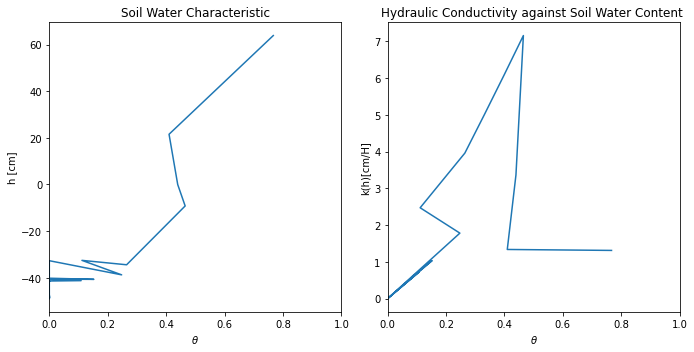

In [26]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1, 2, 1) 
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(data_regular['teta_v'],data_regular['h[cm]']) 
ax2.plot(data_regular['teta_v'],data_regular['k(h)[cm/H]'])

ax1.set_xlabel(r'$\theta$ ') 
ax1.set_ylabel('h [cm]')
ax2.set_xlabel(r'$\theta$ ')
ax2.set_ylabel('k(h)[cm/H]')

ax1.set_title('Soil Water Characteristic')
ax2.set_title('Hydraulic Conductivity against Soil Water Content ')

ax1.set_xlim([0, 1])
ax2.set_xlim([0, 1])

plt.tight_layout() 
plt.show()